<function matplotlib.pyplot.show(close=None, block=None)>

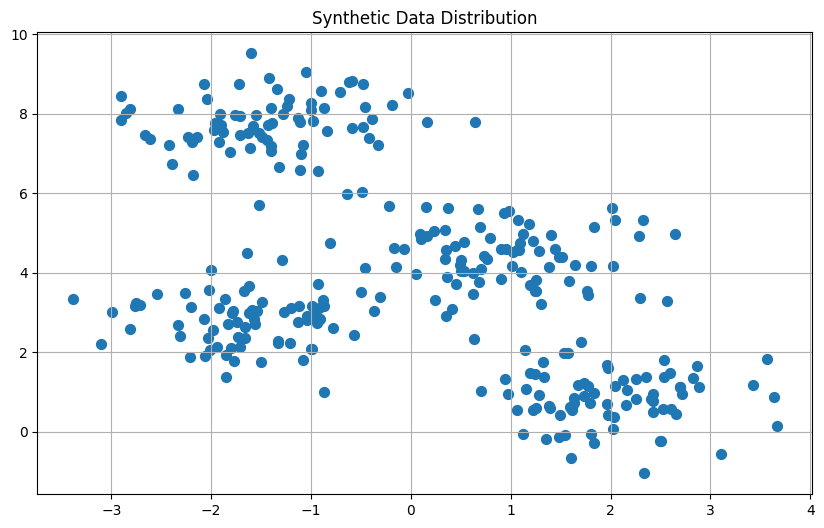

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


X_synth, Y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.70, random_state=0)


plt.figure(figsize=(10, 6))
plt.scatter(X_synth[:, 0], X_synth[:, 1], s=50)
plt.title('Synthetic Data Distribution')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

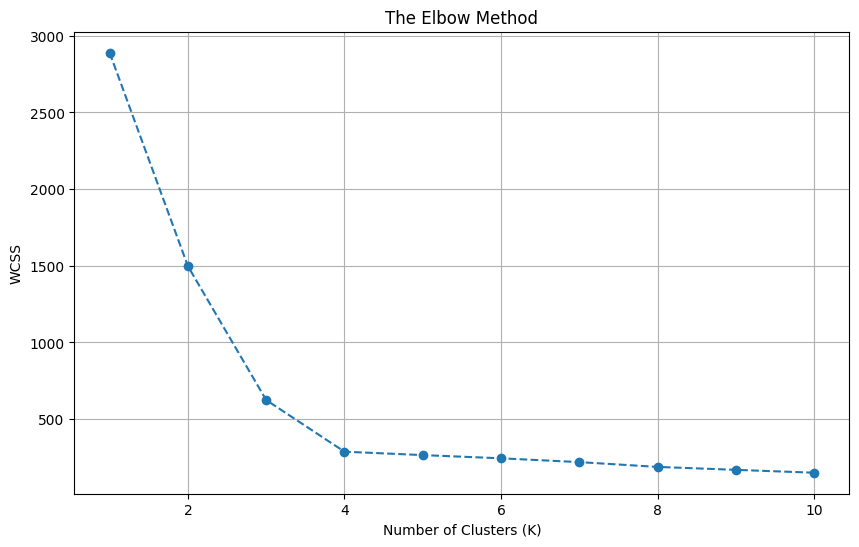

In [7]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X_synth)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

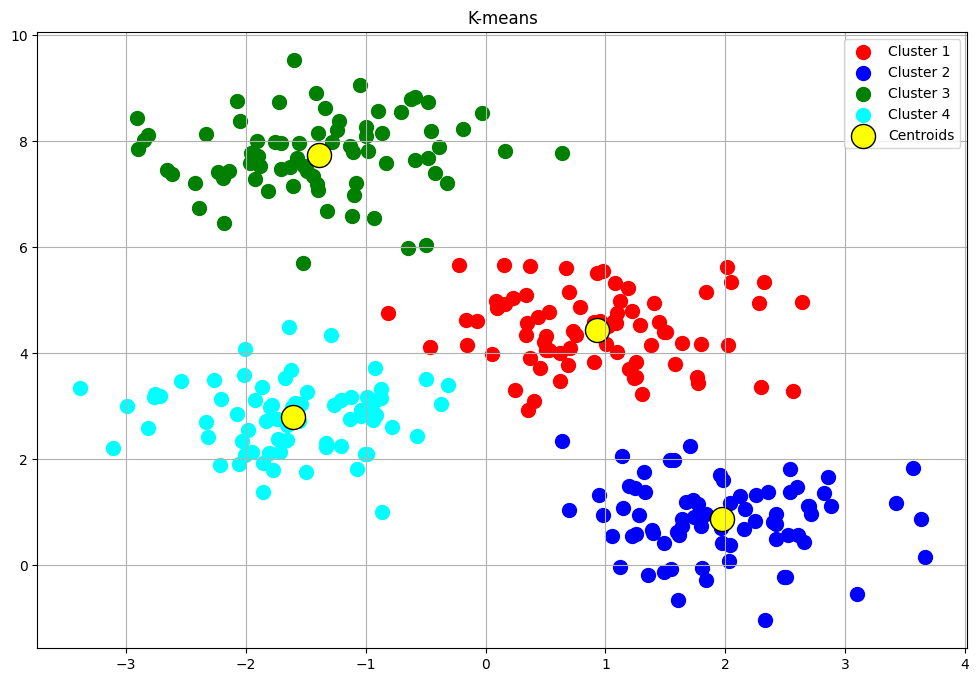

In [8]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0)


Y_kmeans = kmeans.fit_predict(X_synth)


plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(optimal_k):
    plt.scatter(X_synth[Y_kmeans == i, 0], X_synth[Y_kmeans == i, 1], s=100, c=colors[i], label=f"Cluster {i+1}")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', edgecolors='black', label='Centroids')

plt.title('K-means')
plt.legend()
plt.grid(True)
plt.show

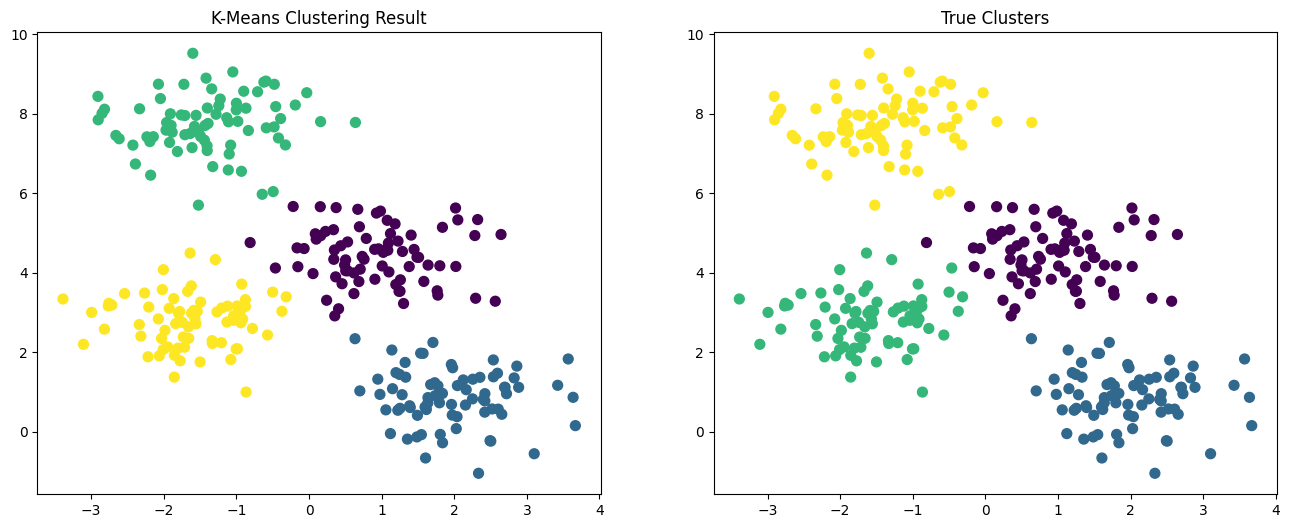

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].scatter(X_synth[:, 0], X_synth[:, 1], s=50, c=Y_kmeans, cmap='viridis')
axes[0].set_title('K-Means Clustering Result')


axes[1].scatter(X_synth[:, 0], X_synth[:, 1], s=50, c=Y_true, cmap='viridis')
axes[1].set_title('True Clusters')

plt.show()